# Lead scoring case Study

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 


The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.


As we can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

Our target is to analysis and make a logistic regression model to predict who will be converted at the end using previous data.

#### Steps for logistic regression model

- Collecting and reading the data 

- Data treatment

    - Filling the missing values with nan or adequate value
    
    - Dropping columns having large number of null/missing values
    
    - Dropped those values with only one value.
- Exploratory data analysis
    - Univariate data analysis 
    - Multivariate data analysis
- Data preparation
    - Forming adequate dummy variables for model building.
    - Splitting the data into train and test sets for training and testing the data.
    - Scaling the numerical variables using a standard scaler.
- Model building
    - Summarizing the data 
    - Feature selection using RFE
    - Assessing the model with StatsModels
    - Obtaining an adequate model using the Value inflation factor method.
    - Creating Prediction
    - Model Evaluation
    - Checking precision and recall values 
    - Plot ROC curve
    - Finding optimal cutoff point
    - Making prediction on test data set
- Conclusion


In [138]:
# importing the libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

### Reading the Data

In [139]:

# reading the given data
df= pd.read_csv('C:\\Users\\pawan\\Desktop\\lead scoring case study\\Lead+Scoring+Case+Study\\Lead Scoring Assignment\\leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [140]:
# getting the adequate information on the data like shape and info.
df.shape

(9240, 37)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

As we can see there are missing values in the given data

In [142]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [143]:
# calculating the missing percentage values.
round(((df.isnull().sum()/len(df))*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [144]:
# Converting all the values to lower case
df = df.applymap(lambda x:x.lower() if type(x) == str else x)

In [145]:
# Replacing 'select' with null values
df = df.replace('select',np.nan)

In [146]:
# calculating the missing percentage values.
round(((df.isnull().sum()/len(df))*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

##### We will be dropping the columns with high perceentage of missing values.

In [147]:
df=df.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score','Tags', 'City', 'Lead Profile','How did you hear about X Education' ],axis=1)

In [148]:
round((df.isnull().sum()/len(df))*100)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [149]:
# dropping variables which are of no use in our model building
df=df.drop(['Prospect ID','Lead Number'],axis=1)

In [150]:
# Checking the number of unique values in all our data.
df.nunique(axis = 0)

Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

##### As we see here some variables with only one value count. hence we will be dropping those columns(no use in model building as well as in EDA).

In [151]:
df=df.drop(['Magazine','Receive More Updates About Our Courses','Get updates on DM Content','Get updates on DM Content','I agree to pay the amount through cheque','Update me on Supply Chain Content'],axis=1)

In [152]:
df.nunique(axis = 0)

Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

In [153]:
# Now we will be filling null values with one specific value.

In [154]:
df['Specialization'] = df['Specialization'].fillna('Not specified')
df['Country'] = df['Country'].fillna('Not specified')
df['What is your current occupation'] = df['What is your current occupation'].fillna('Not specified')
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('Not specified')

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [156]:
# Rechecking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [157]:
# dropping rows with null values.
df=df.dropna()

In [158]:
round((df.isnull().sum()/len(df))*100)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

##### Now our data has no missing values.

In [159]:
df.shape

(9074, 21)

In [160]:
df['Country'].value_counts()

india                   6491
Not specified           2296
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
south africa               4
nigeria                    4
germany                    4
kuwait                     4
canada                     4
sweden                     3
uganda                     2
philippines                2
bangladesh                 2
netherlands                2
italy                      2
china                      2
belgium                    2
ghana                      2
asia/pacific region        2
sri lanka                  1
denmark                    1
kenya                      1
russia                     1
liberia                    1
indonesia     

Here we can see high number of values in country col so we will be adding all other countries in a specific column.

In [161]:

def countries(x):

    col = ""

    if x == 'india':
        col  = "India"

    elif x == "Not specified":
        col = "Not specified"
    else: 
        col = "Rest of the World"
        
        
    return col

In [162]:
#Adding countries other than india in a column named 'Rest of the world'
df['Country'] = df.apply(lambda x: countries(x['Country']), axis = 1)

In [163]:
df['Country'].value_counts()

India                6491
Not specified        2296
Rest of the World     287
Name: Country, dtype: int64

## EDA

In this section we will be performing univariate and multivariate analysis.

### Univariate analysis

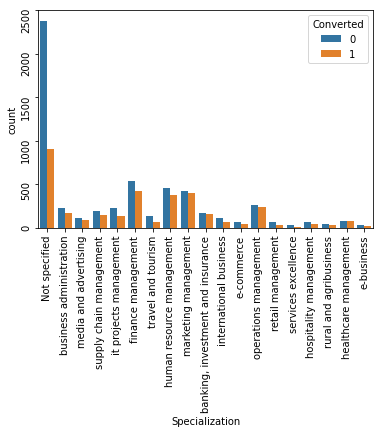

In [164]:
# graph of specialization vs target variable Converted.
sns.countplot(x='Specialization', hue='Converted', data= df).tick_params(rotation=90)

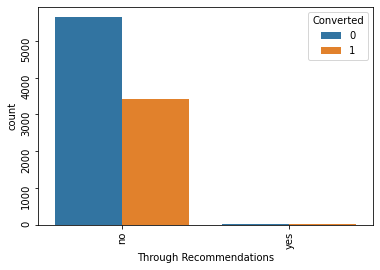

In [165]:
# graph of Through Recommendations vs target variable Converted.
sns.countplot(x='Through Recommendations', hue='Converted', data= df).tick_params(rotation=90)

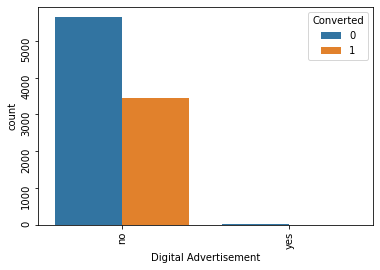

In [166]:
# graph of Digital Advertisement vs target variable Converted.
sns.countplot(x='Digital Advertisement', hue='Converted', data= df).tick_params(rotation=90)

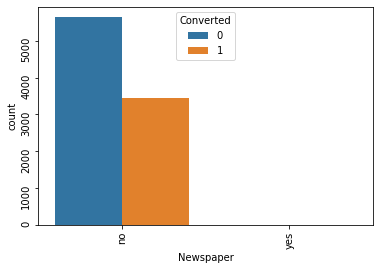

In [167]:
# graph of 'Newspaper' vs target variable Converted.
sns.countplot(x='Newspaper', hue='Converted', data= df).tick_params(rotation=90)

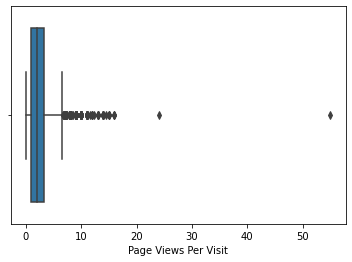

In [168]:
sns.boxplot(df['Page Views Per Visit'])

In [169]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.

In [170]:
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

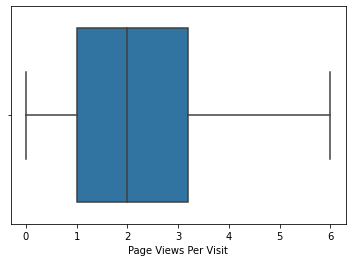

In [171]:
sns.boxplot(df['Page Views Per Visit'])

### Mulivariate

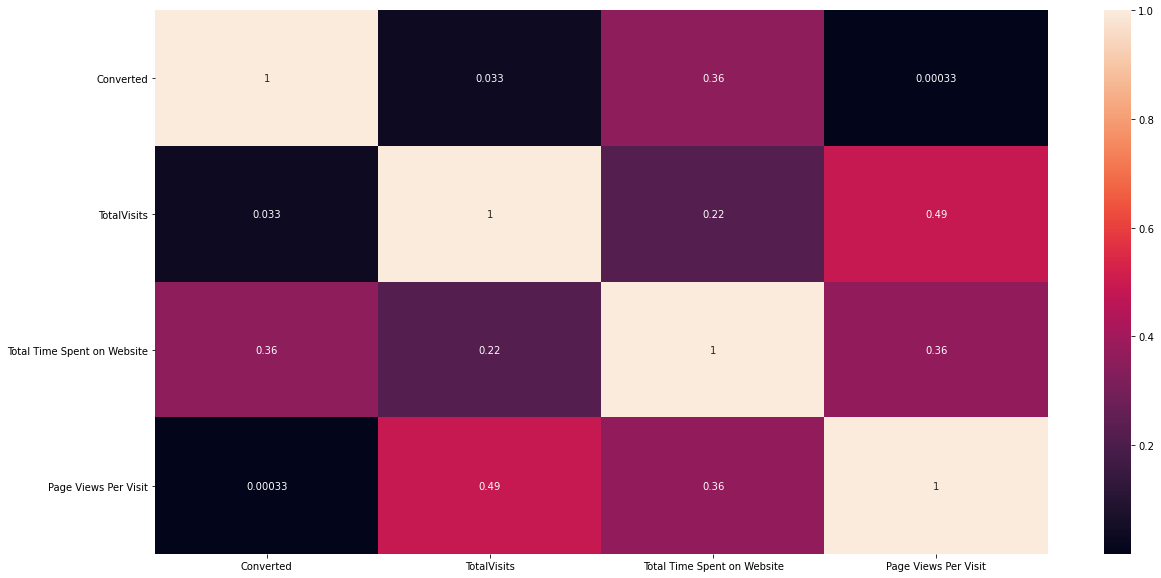

In [172]:
# Making a heatmap t determine the correlations between the variables
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

### Data preperation

#### getting dummies

In [173]:
df.loc[:, df.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [174]:
# Getting dummies for the rest of categorical columns.
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
df1 = pd.concat([df, dummy1], axis=1)

In [175]:
df1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,Not specified,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.5,email opened,India,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,India,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,India,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,India,...,0,0,1,0,0,0,0,0,0,0


In [176]:
df1=df1.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'],axis=1)

In [177]:
df1.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [178]:
df1.shape

(9074, 95)

In [179]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 95 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Converted                                                                9074 non-null   int64  
 1   TotalVisits                                                              9074 non-null   float64
 2   Total Time Spent on Website                                              9074 non-null   int64  
 3   Page Views Per Visit                                                     9074 non-null   float64
 4   Lead Origin_landing page submission                                      9074 non-null   uint8  
 5   Lead Origin_lead add form                                                9074 non-null   uint8  
 6   Lead Origin_lead import                                                 

df1=df1.drop(['What matters most to you in choosing a course_Not specified','Specialization_Not specified','What is your current occupation_Not specified','Country_Not specified'], axis=1)

### Test_train_split

In [180]:
# Putting feature variable to X
X = df1.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [181]:
# Putting response variable to y
y = df1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [182]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [183]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3009,-0.284595,-0.160255,-0.155018,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1012,-0.284595,-0.540048,-0.155018,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9226,-0.671384,-0.888650,-1.265540,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,-0.284595,1.643304,-0.155018,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.295588,2.017593,0.122613,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [184]:
# Checking the Converted Rate
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.85541106458012

### Model Building

In [185]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6260
Model Family:                Binomial   Df Model:                           90
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2438.3
Date:                Mon, 08 Mar 2021   Deviance:                       4876.7
Time:                        21:58:13   Pearson chi2:                 6.11e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      22.3620   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
TotalVisits                                                                 0.2459      0.062      3.948      0.000       0.124       0.368
Total Time Spent on Website                                                 1.1369      0.043     26.563      0.000       1.053       1.221
Page Views Per Visit                                                       -0.2350      0.061     -3.879      0.000      -0.354      -0.116
Lead Origin_landing page submission                                        -0.8450      0.147     -5.768      0.000      -1.132      -0.558
Lead Origin_lead add form                                                  -1.1195      1.498     -0.747      0.455      -4.056       1.817
Lead Origin_lead import                                                    23.7929   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_blog                                                          -23.4661   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_click2call                                                      0.8769      2.468      0.355      0.722      -3.960       5.714
Lead Source_direct traffic                                                 -0.9478      1.453     -0.652      0.514      -3.796       1.900
Lead Source_facebook                                                      -24.7400   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_google                                                         -0.6671      1.452     -0.459      0.646      -3.514       2.180
Lead Source_live chat                                                      24.6262   9.26e+04      0.000      1.000   -1.82e+05    1.82e+05
Lead Source_nc_edm                                                         24.6387   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_olark chat                                                     -0.3799      1.479     -0.257      0.797      -3.279       2.519
Lead Source_organic search                                                 -0.8135      1.455     -0.559      0.576      -3.665       2.038
Lead Source_pay per click ads                                             -23.6049   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_press_release                                                 -22.2869   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_reference                                                       2.5328      2.115      1.198      0.231      -1.613       6.678
Lea

### Feature Selection Using RFE

In [186]:
logreg = LogisticRegression()

In [187]:
rfe = RFE(logreg,15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [188]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True, False, False, False, False, False, False,  True,  True,
       False, False,  True, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False])

In [189]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 51),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 52),
 ('Lead Origin_landing page submission', False, 15),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 76),
 ('Lead Source_blog', False, 61),
 ('Lead Source_click2call', False, 35),
 ('Lead Source_direct traffic', False, 38),
 ('Lead Source_facebook', False, 36),
 ('Lead Source_google', False, 40),
 ('Lead Source_live chat', False, 60),
 ('Lead Source_nc_edm', False, 8),
 ('Lead Source_olark chat', False, 77),
 ('Lead Source_organic search', False, 39),
 ('Lead Source_pay per click ads', False, 59),
 ('Lead Source_press_release', False, 71),
 ('Lead Source_reference', False, 7),
 ('Lead Source_referral sites', False, 37),
 ('Lead Source_social media', False, 41),
 ('Lead Source_testone', False, 55),
 ('Lead Source_welearn', False, 80),
 ('Lead Source_welearnblog_home', False, 62),
 ('Lead Source_welingak website', True, 1),
 ('Lead Source_youtubechann

In [190]:
col = X_train.columns[rfe.support_]

In [191]:
# Selecting columns selected by RFE
X_train = X_train[col]

#### Assessing the model with StatsModels

In [192]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.9
Date:                Mon, 08 Mar 2021   Deviance:                       5145.9
Time:                        21:58:39   Pearson chi2:                 6.18e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -2.3670      0.091    -25.878      0.000      -2.546      -2.188
Total Time Spent on Website                                               1.1450      0.041     27.693      0.000       1.064       1.226
Lead Origin_lead add form                                                 2.2419      0.228      9.844      0.000       1.796       2.688
Lead Source_welingak website                                              2.0006      0.752      2.660      0.008       0.526       3.475
Do Not Email_yes                                                         -1.8104      0.184     -9.838      0.000      -2.171      -1.450
Last Activity_converted to lead                                          -1.3229      0.224     -5.906      0.000      -1.762      -0.884
Last Activity_had a phone conversation                                    1.3030      1.171      1.113      0.266      -0.991       3.598
Last Activity_olark chat conversation                                    -1.3161      0.163     -8.078      0.000      -1.635      -0.997
Last Activity_sms sent                                                    1.2392      0.076     16.374      0.000       1.091       1.388
Last Activity_unsubscribed                                                1.4738      0.471      3.127      0.002       0.550       2.398
Country_Not specified                                                     1.4020      0.107     13.108      0.000       1.192       1.612
What is your current occupation_housewife                                22.7474   1.59e+04      0.001      0.999   -3.12e+04    3.12e+04
What is your current occupation_working professional                      2.4706      0.189     13.067      0.000       2.100       2.841
What matters most to you in choosing a course_better career prospects     1.2976      0.088     14.723      0.000       1.125       1.470
Last Notable Activity_had a phone conversation                            2.2779      1.617      1.409      0.159      -0.891       5.446
Last Notable Activity_unreachable                                         2.0244      0.495      4.086      0.000       1.053       2.995
=========================================================================================================================================
"""

In [193]:
col=col.drop(['What is your current occupation_housewife','Last Activity_had a phone conversation','Last Notable Activity_had a phone conversation'])

In [194]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2586.7
Date:                Mon, 08 Mar 2021   Deviance:                       5173.3
Time:                        21:58:39   Pearson chi2:                 6.20e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -2.3469      0.091    -25.769      0.000      -2.525      -2.168
Total Time Spent on Website                                               1.1404      0.041     27.711      0.000       1.060       1.221
Lead Origin_lead add form                                                 2.2742      0.227     10.007      0.000       1.829       2.720
Lead Source_welingak website                                              1.9694      0.752      2.618      0.009       0.495       3.444
Do Not Email_yes                                                         -1.8173      0.184     -9.884      0.000      -2.178      -1.457
Last Activity_converted to lead                                          -1.3434      0.224     -6.004      0.000      -1.782      -0.905
Last Activity_olark chat conversation                                    -1.3281      0.163     -8.156      0.000      -1.647      -1.009
Last Activity_sms sent                                                    1.2184      0.075     16.153      0.000       1.071       1.366
Last Activity_unsubscribed                                                1.4594      0.471      3.099      0.002       0.536       2.382
Country_Not specified                                                     1.3803      0.107     12.961      0.000       1.172       1.589
What is your current occupation_working professional                      2.4595      0.189     13.024      0.000       2.089       2.830
What matters most to you in choosing a course_better career prospects     1.3037      0.088     14.823      0.000       1.131       1.476
Last Notable Activity_unreachable                                         2.0028      0.495      4.042      0.000       1.032       2.974
=========================================================================================================================================
"""

In [195]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [196]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Country_Not specified,2.20
1,Lead Origin_lead add form,1.86
10,What matters most to you in choosing a course_...,1.81
6,Last Activity_sms sent,1.51
0,Total Time Spent on Website,1.35
5,Last Activity_olark chat conversation,1.34
2,Lead Source_welingak website,1.33
9,What is your current occupation_working profes...,1.20
3,Do Not Email_yes,1.12
7,Last Activity_unsubscribed,1.08


## Creating Prediction

In [197]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.073806
1012    0.089429
9226    0.632316
4750    0.678219
7987    0.922456
1281    0.772196
2880    0.033831
4971    0.912653
7536    0.889158
1248    0.908392
dtype: float64

In [198]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07380554, 0.08942943, 0.63231621, 0.67821924, 0.9224559 ,
       0.77219634, 0.03383096, 0.91265277, 0.88915834, 0.90839174])

In [199]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_prob
0,0,0.073806
1,0,0.089429
2,0,0.632316
3,1,0.678219
4,1,0.922456


#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [200]:
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID
0,0,0.073806,3009
1,0,0.089429,1012
2,0,0.632316,9226
3,1,0.678219,4750
4,1,0.922456,7987


In [201]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.073806,3009,0
1,0,0.089429,1012,0
2,0,0.632316,9226,1
3,1,0.678219,4750,1
4,1,0.922456,7987,1


# Model Evaluation

In [202]:
from sklearn import metrics

In [203]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3456  449]
 [ 742 1704]]


In [204]:
# Predicted     not_converted    converted
# Actual
# not_Converted        3462        443
# converted            741        1705  

In [205]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.812470477090222


## Metrics beyond simply accuracy

In [206]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [207]:
# Let's see the sensitivity of our logistic regression model
TP / (TP+FN)

0.6966475878986099

In [208]:
# Let us calculate specificity
TN / (TN+FP)

0.8850192061459667

In [209]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/ (TN+FP)

0.11498079385403329

In [210]:
# positive predictive value 
TP / float(TP+FP)

0.791453785415699

In [211]:
# Negative predictive value
TN / (TN+ FN)

0.8232491662696522

### Plotting the ROC Curve

An ROC curve demonstrates several things:

   - It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
   - The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
   - The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


In [212]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [213]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

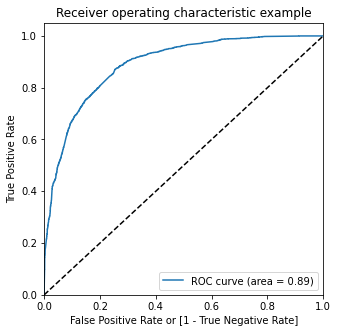

In [214]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [215]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.073806,3009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.089429,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.632316,9226,1,1,1,1,1,1,1,1,0,0,0
3,1,0.678219,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.922456,7987,1,1,1,1,1,1,1,1,1,1,1


In [216]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.603999  0.986100  0.364661
0.2   0.2  0.760038  0.919460  0.660179
0.3   0.3  0.789010  0.877351  0.733675
0.4   0.4  0.809321  0.764922  0.837132
0.5   0.5  0.812470  0.696648  0.885019
0.6   0.6  0.806645  0.634096  0.914725
0.7   0.7  0.779720  0.517989  0.943662
0.8   0.8  0.760668  0.430499  0.967478
0.9   0.9  0.709967  0.268602  0.986428


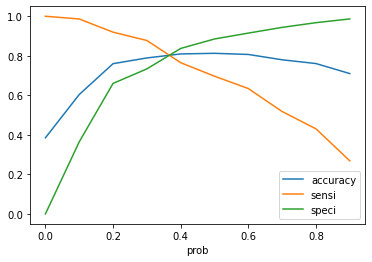

In [217]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.4 is the optimum point to take it as a cutoff probability

In [218]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.073806,3009,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.089429,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.632316,9226,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.678219,4750,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.922456,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [219]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8042827901117934

In [220]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3155,  750],
       [ 493, 1953]], dtype=int64)

In [221]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [222]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7984464431725266

In [223]:
# Let us calculate specificity
TN / float(TN+FP)

0.8079385403329066

### Making predictions on the test set

In [224]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3271,0.143722,-0.591008,0.998931,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,0.391416,1.894051,1.564920,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7936,-0.351665,-0.743117,-0.133048,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4216,-0.847051,-0.878732,-1.265027,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3830,1.134496,-0.578179,2.130909,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_welingak website,Do Not Email_yes,Last Activity_converted to lead,Last Activity_olark chat conversation,Last Activity_sms sent,Last Activity_unsubscribed,Country_Not specified,What is your current occupation_working professional,What matters most to you in choosing a course_better career prospects,Last Notable Activity_unreachable
3271,-0.591008,0,0,0,0,0,0,0,0,0,0,0
1490,1.894051,0,0,0,0,0,0,0,0,1,1,0
7936,-0.743117,0,0,0,0,0,0,0,0,0,0,0
4216,-0.878732,1,0,0,0,0,0,0,1,0,1,0
3830,-0.578179,0,0,0,0,0,0,0,0,0,0,0


In [226]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm


,const,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_welingak website,Do Not Email_yes,Last Activity_converted to lead,Last Activity_olark chat conversation,Last Activity_sms sent,Last Activity_unsubscribed,Country_Not specified,What is your current occupation_working professional,What matters most to you in choosing a course_better career prospects,Last Notable Activity_unreachable
3271,1.0,-0.591008,0,0,0,0,0,0,0,0,0,0,0
1490,1.0,1.894051,0,0,0,0,0,0,0,0,1,1,0
7936,1.0,-0.743117,0,0,0,0,0,0,0,0,0,0,0
4216,1.0,-0.878732,1,0,0,0,0,0,0,1,0,1,0
3830,1.0,-0.578179,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0.640526,0,0,0,1,0,0,0,0,0,0,0
2879,1.0,0.200692,0,0,0,1,0,0,0,0,0,1,0
6501,1.0,1.567841,0,0,0,0,0,1,0,0,0,1,0
7155,1.0,0.065077,0,0,0,0,0,0,0,0,0,0,0


In [227]:
#storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

In [228]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)


In [229]:
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversted_prob'})
y_pred_final.head()

,Converted,Conversted_prob
0,0,0.046491
1,1,0.972784
2,0,0.039378
3,1,0.833311
4,0,0.047144


In [230]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversted_prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversted_prob,final_predicted
0,0,0.046491,0
1,1,0.972784,1
2,0,0.039378,0
3,1,0.833311,1
4,0,0.047144,0
...,...,...,...
2718,0,0.049275,0
2719,0,0.103618,0
2720,1,0.876888,1
2721,0,0.093411,0


In [231]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8057289753947852

In [232]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1416,  318],
       [ 211,  778]], dtype=int64)

In [233]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [234]:
# Calculating the sensitivity
TP/(TP+FN)

0.7866531850353893

In [235]:
# Calculating the specificity
TN/(TN+FP)

0.8166089965397924

### Precision and Recall

In [236]:
#Looking at the confusion matrix again
from sklearn.metrics import precision_score, recall_score

In [237]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.791453785415699

In [238]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6966475878986099

#### Precision and recall tradeoff

In [239]:
from sklearn.metrics import precision_recall_curve

In [240]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: predicted, Length: 6351, dtype: int64)

In [241]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

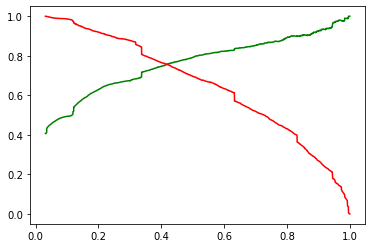

In [242]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [243]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.41 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.073806,3009,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.089429,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.632316,9226,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.678219,4750,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.922456,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [244]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3289,  616],
       [ 586, 1860]], dtype=int64)

In [245]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8107384663832468

In [246]:
# Precision = TP / TP + FP
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7512116316639742

In [247]:
# Recall = TP/ TP + FN
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.7604251839738349

### Making predictions on the test set

In [248]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Converted_prob
0,0,0.046491
1,1,0.972784
2,0,0.039378
3,1,0.833311
4,0,0.047144


In [249]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Converted_prob,final_predicted
0,0,0.046491,0
1,1,0.972784,1
2,0,0.039378,0
3,1,0.833311,1
4,0,0.047144,0
...,...,...,...
2718,0,0.049275,0
2719,0,0.103618,0
2720,1,0.876888,1
2721,0,0.093411,0


In [250]:
y_pred_final.head()

,Converted,Converted_prob,final_predicted
0,0,0.046491,0
1,1,0.972784,1
2,0,0.039378,0
3,1,0.833311,1
4,0,0.047144,0


In [251]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8138082996694822

In [252]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1468,  266],
       [ 241,  748]], dtype=int64)

In [253]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [254]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.73767258382643

In [255]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.756319514661274